In [25]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt

## 1. Create 2D IOR field

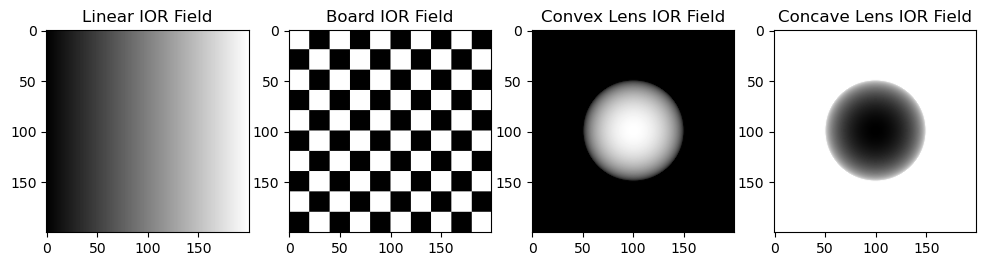

In [29]:
height, width = 200, 200
gradient = np.linspace(0, 1, width, dtype=np.float32)
linear_ior_field = np.tile(gradient, (height, 1))

tile_size = 20
board_ior_field = np.kron([[1, 0] * (width//tile_size//2),
                 [0, 1] * (width//tile_size//2)] * (height//tile_size//2),
                np.ones((tile_size, tile_size)))

x = np.linspace(-1, 1, width)
y = np.linspace(-1, 1, height)
X, Y = np.meshgrid(x, y)
R = 0.5
r = np.sqrt(X**2 + Y**2)
n0, n1 = 1.5, 1.0

convex_lens_ior_field = n0 + (n1 - n0) * (1 - np.sqrt(1 - np.minimum(r/R, 1)**2))

concave_lens_ior_field = n0 - (n1 - n0) * (1 - np.sqrt(1 - np.minimum(r/R, 1)**2))


# plot
plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.imshow(linear_ior_field, cmap='gray')
plt.title('Linear IOR Field')
plt.subplot(142)
plt.imshow(board_ior_field, cmap='gray')
plt.title('Board IOR Field')
plt.subplot(143)
plt.imshow(convex_lens_ior_field, cmap='gray')
plt.title('Convex Lens IOR Field')
plt.subplot(144)
plt.imshow(concave_lens_ior_field, cmap='gray')
plt.title('Concave Lens IOR Field')
plt.show()